In [1]:
import cv2
import numpy as np

In [2]:
from matplotlib import pyplot as plt

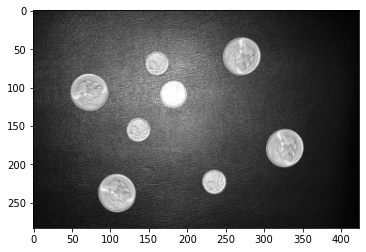

In [3]:
img = cv2.imread('coins.png', cv2.IMREAD_GRAYSCALE)

plt.imshow(img, cmap='gray')

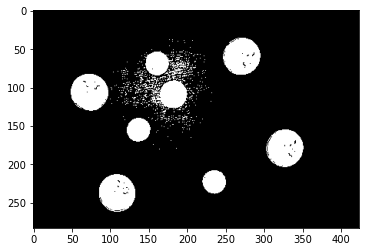

In [10]:
binarised = cv2.threshold(img, 150.0, 255.0, cv2.THRESH_BINARY)[1]
plt.imshow(binarised, cmap='gray')

In [26]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))

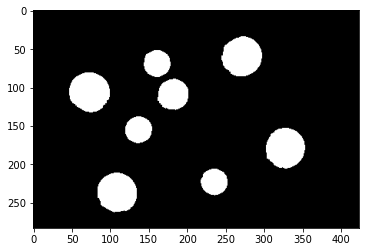

In [27]:
denoised = cv2.erode(binarised, kernel)
denoised = cv2.dilate(denoised, kernel, iterations=2)

plt.imshow(denoised, cmap='gray')

In [31]:
contours, _ = cv2.findContours(denoised, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
all_coins = len(contours)
print(all_coins)

8


In [43]:
delete_small = cv2.erode(denoised, kernel, iterations=9)
contours, _ = cv2.findContours(delete_small, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
big_coins = len(contours)
print('big coins: ', big_coins)
print('small coins: ', all_coins - big_coins)

big coins:  4
small coins:  4
